# Анализ разницы времени Event Time и Transaction Time

На входе данные в формате csv:
- `event_time`: время события в формате unix timestamp в милисекундах
- `transaction_time`: время транзакции в формате unix timestamp в милисекундах


In [2]:
# Загрузка данных
import pandas as pd
from pathlib import Path
pd.set_option('display.float_format', '{:.8f}'.format)
# Путь к файлу метрик
DATA_PATH = Path("data") / "book_Ticker-2024-02-29.csv"

# Загрузка данных
# ts;value
# 1737558127500139;16.00000000
# 1737558127501114;653722.00000000
# 1737558128155640;18.00000000

data = pd.read_csv(DATA_PATH, delimiter=",", usecols=["event_time", "transaction_time"])
data['diff'] = data['event_time'] - data['transaction_time']

In [27]:
# Предобработка данных
# Преобразуем ts в формат datetime
data['ts'] = pd.to_datetime(data['ts'], unit='us')

# Сортируем данные по ts
data = data.sort_values(by='ts').reset_index(drop=True)

In [3]:
data

,transaction_time,event_time,diff
0,1709164800002,1709164800007,5
1,1709164800005,1709164800011,6
2,1709164800006,1709164800016,10
3,1709164800006,1709164800016,10
4,1709164800007,1709164800016,9
...,...,...,...
51927238,1709251199743,1709251199747,4
51927239,1709251199797,1709251199803,6
51927240,1709251199802,1709251199807,5
51927241,1709251199949,1709251199955,6


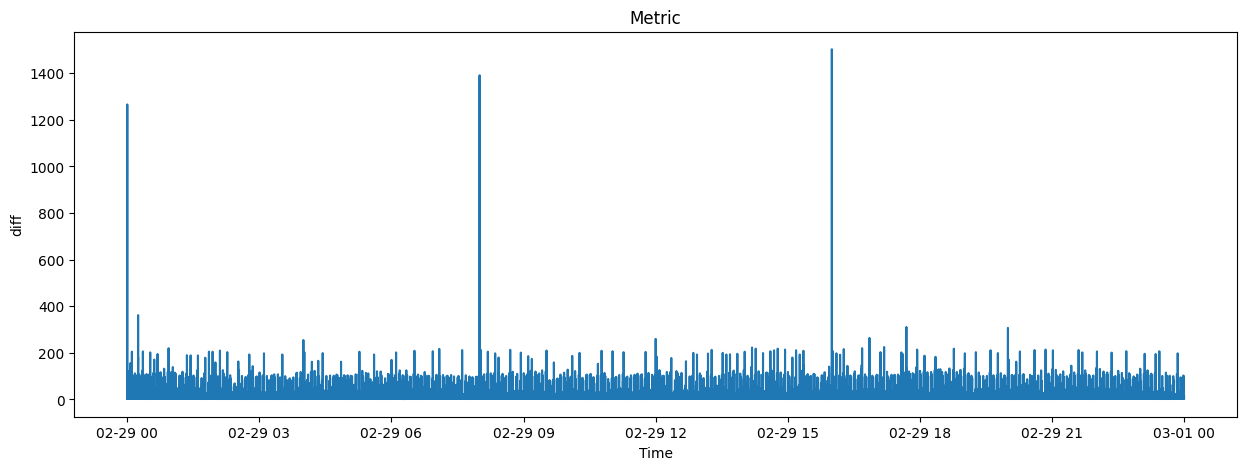

In [5]:
# Построим график используя Matplotlib, где на оси X будет время, а на оси Y - значение метрики

import matplotlib.pyplot as plt

# Преобразуем transaction_time в формат datetime
data['transaction_time'] = pd.to_datetime(data['transaction_time'], unit='ms')

plt.figure(figsize=(15, 5))
plt.plot(data['transaction_time'], data['diff'])
plt.xlabel('Time')
plt.ylabel('diff')
plt.title('Metric')

plt.show()


In [30]:
# Отсортируем по значению метрики

In [31]:
# Верхние 10 значений метрики
data['value'].sort_values(ascending=False).head(10)

12069203    503990665
8861057     156307843
8861076       5226491
12069208      2791544
12089700       666326
1              653722
12269593       589162
12269582       569390
12517891       269720
11823054       222779
Name: value, dtype: int64

In [6]:
# Отобразим статистику по метрике
print("Медиана:", data['diff'].median())
print("Среднее:", data['diff'].mean())
print("Максимум:", data['diff'].max())
print("Минимум:", data['diff'].min())
print("Стандартное отклонение:", data['diff'].std())


Медиана: 6.0
Среднее: 7.32447959927316
Максимум: 1503
Минимум: 1
Стандартное отклонение: 10.02528088332823


Для анализа были загружены данные из файла `book_Ticker-2024-02-29.csv` инструмента `BTCUSDT`, содержащего в себе информацию о времени события и времени транзакции. Данные были представлены в виде таблицы, содержащей следующие столбцы:
- `event_time`: время события в формате unix timestamp в милисекундах
- `transaction_time`: время транзакции в формате unix timestamp в милисекундах

Выводы:

- Среднее значение разницы времени между Event Time и Transaction Time составляет 7.324479 миллисекунд
- Медиана разницы времени между Event Time и Transaction Time составляет 6 миллисекунд
- Максимальное значение разницы времени между Event Time и Transaction Time составляет 1503 миллисекунд
- Минимальное значение разницы времени между Event Time и Transaction Time составляет 1 миллисекунд


